# Assignment 1: Introduction to the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Numerical stability of the binary cross-entropy loss function

We will use the binary cross-entropy loss function to train our RNN, which is defined as 
$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
where $y$ is the label and $\hat y$ is a prediction, which comes from a model (e.g. an RNN) and is usually sigmoid-activated, i.e., we have
$$
\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.
$$
The argument $z$ is called *logit*. For reasons of numerical stability it is better to let the model emit the logit $z$ (instead of the prediction $\hat y$) and incorporate the sigmoid activation into the loss function. Explain why this is the case and how we can gain numerical stability by combining the two functions $L_{\text{BCE}}(\hat y, y)$ and $\sigma(z)$ into one function $L(z, y) = L_{\text{BCE}}(\sigma(z), y)$. 

*Hint: Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ and argue why the right-hand side is numerically more stable. Finally, express $L(z,y)$ in terms of that form.*

########## YOUR SOLUTION HERE ##########

1.) Prove: $\log(1+e^{-z}) = \log (1+e^{-|z|}) + \max(0, -z)$ <br>
I changed the exponent in order to fit to the expression that I encountered in 3.), with the same argumentation the original expression can be proven as well

Case distinction:

$z>= 0:$
- $\log (1+e^{-|z|}) + \max(0, -z) = \log (1+e^{-z}) + 0 = \log(1+e^{-z})$

$z < 0:$
- $\log (1 + e^{-z}) = \log (1 + e^{|z|})$
- $\log (1+e^{-|z|}) + \max(0, |z|) = \log (1+e^{-|z|}) + |z| = \log (1+e^{-|z|}) + \log(e^{|z|}) = \log ((1+e^{-|z|}) e^{|z|}) = \log (1+e^{|z|})$


2.) Argue why $\log (1+e^{-|z|}) + \max(0, -z)$ is numerically more stable: <br>

Its because of the absolute value of the exponent. The new function $e
^{-|z|}$ is bounded between 0 and 1, this means no matter how large the logits are the function will always give us so to say nice values. Whereas before we had $e^{-z}$, which will diverge to inifnity very quickly (exponentially quickly) for inceasing negative logits. Therefore, we have a numerically more stable expression on the right hand side.   

3.) Evaluate the numerically stable Loss: 

$$
\begin{align}
L(z, y) &= L_{\text{BCE}}(\sigma(z), y) \\
        &= -y \log (\frac{1}{1+e^{-z}}) - (1-y) \log (1-\frac{1}{1+e^{-z}})\\
        &= -y (\log (1) - \log ({1+e^{-z}})) - (1-y) (\log (e^{-z}) -  \log (1+e^{-z})) \\ 
        &= y \log(1+e^{-z}) + (1-y)(z + \log(1+e^{-z}) \\
\text{(use the proved equality from 1.) )} &= y (\log (1+e^{-|z|}) + \max(0, -z)) + (1-y) (\log (1+e^{-|z|}) + z
+ \max(0, -z))\\
        &= y (\log (1+e^{-|z|}) + \max(0, -z)) + (1-y) (\log (1+e^{-|z|}) + \max(0, z))
\end{align}
$$

We can see that the Loss above (L(z,y)) we arrived at only consists of nummerically more stable terms.

## Exercise 2: Derivative of the loss

Calculate the derivative of the binary cross-entropy loss function $L(z, y)$ with respect to the logit $z$.

########## YOUR SOLUTION HERE ##########

Note: I already start from a slightly simplified form of L(z,y), please check 1.1 for derivation

$$
\begin{align}
\frac{\delta}{\delta z} L(z,y) &= \frac{\delta}{\delta z}(y \log(1+e^{-z}) + (1-y)(z + \log(1+e^{-z}))\\
            &= y \frac{1}{1+e^{-z}} \frac{\delta}{\delta z}(1+e^{-z}) + (1-y)(1 + \frac{1}{1+e^{-z}} \frac{\delta}{\delta z}(1+e^{-z}))\\
            &= - y \frac{-e^{-z}}{1+e^{-z}} +  (1-y)(1 - \frac{e^{-z}}{1+e^{-z}})\\
            &= - y \frac{-e^{-z}}{1+e^{-z}} +  1 - y -\frac{e^{-z}}{1+e^{-z}} + y\frac{e^{-z}}{1+e^{-z}}\\
            &= -y + 1 -\frac{e^{-z}}{1+e^{-z}}\\
            &= -y \frac{1+e^{-z}-e^{-z}}{1+e^{-z}}\\
            &= \frac{1}{1+e^{-z}} -y \\
            &= \sigma(z) -y = \hat y - y
\end{align}
$$

## Exercise 3: Initializing the network
Consider the fully recurrent network
$$
s(t) = W x(t) + R a(t-1) \\
a(t) = \tanh(s(t)) \\
z(t) = V a(t) \\
\hat y(t) = \sigma(z(t))
$$
for $t \in \mathbb{N}, x(t) \in \mathbb{R}^{D}, s(t) \in \mathbb{R}^{I}, a(t) \in \mathbb{R}^{I}, z(t) \in \mathbb{R}^K, \hat y(t) \in \mathbb{R}^K$ and $W, R, V$ are real matrices of appropriate sizes and $\hat a(0) = 0$. 

*Compared to the lecture notes we choose $f(x) = \tanh(x) = (e^x - e^{-x})(e^x + e^{-x})^{-1}$ and $\varphi(x) = \sigma(x) = (1+e^{-x})^{-1}$. Further, we introduced an auxiliary variable $z(t)$ and transposed the weight matrices.*

Write a function `init` that takes a `model` and integers $D, I, K$ as arguments and stores the matrices $W, R, V$ as members `model.W`, `model.R`, `model.V`, respectively. The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01. 

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid

class Obj(object):
    pass

model = Obj()
T, D, I, K = 10, 3, 5, 1

def init(model, D, I, K):
    ########## YOUR SOLUTION HERE ##########   
    rng = np.random.default_rng()
    model.W =  rng.uniform(-0.01,0.01, (I,D))
    model.R =  rng.uniform(-0.01,0.01, (I,I))
    model.V =  rng.uniform(-0.01,0.01, (K,I))

Obj.init = init
model.init(D, I, K)

## Exercise 4: The forward pass
Implement the forward pass for the fully recurrent network for sequence classification (many-to-one mapping). To this end, write a function `forward` that takes a `model`, a sequence of input vectors `x`, and a label `y` as arguments. The inputs will be represented as a `numpy` array of shape `(T, D)`. It should execute the behavior of the fully recurrent network and evaluate the (numerically stabilized) binary cross-entropy loss at the end of the sequence and return the resulting loss value. Store the sequence of hidden activations $(a(t))_{t=1}^T$ and the logit $z(T)$ into `model.a` and `model.z`, respectively. 

In [2]:
def forward(model, x, y):
    ########## YOUR SOLUTION HERE ##########
    
    T, D = x.shape
    K, I = model.V.shape
    
    # initialize a
    model.a = np.zeros((T,I))   
    
    for t in range(T):

        s_t = model.W @ x[t-1] + model.R @ model.a[t-1]
        
        model.a[t] = (np.exp(s_t) - np.exp(-s_t)) * ((np.exp(s_t) + np.exp(-s_t))**(-1))
        # np.tanh(s_t) -> would also be possible
        
        z_t = model.V @ model.a[t]
        
    model.z = z_t
    
    # calculate loss
    loss = y * (np.log(1 + np.exp(-np.absolute(z_t)) + np.maximum(0,-z_t))) + \
        (1-y) * (np.log(1 + np.exp(-np.absolute(z_t)) + np.maximum(0, z_t)))
    
    return loss
    
    
Obj.forward = forward
model.forward(np.random.uniform(-1, 1, (T, D)), 1)

array([0.69314718])

## Exercise 5: The computational graph

Visualize the computational graph of the fully recurrent network unfolded in time. The graph should show the functional dependencies of the nodes $x(t), a(t), z(t), L(z(t), y(t))$ for $t \in \{1, 2, 3\}$. Use the package `networkx` in combination with `matplotlib` to draw a directed graph with labelled nodes and edges. If you need help take a look at [this guide](https://networkx.guide/visualization/basics/). Make sure to arrange the nodes in a meaningful way. 

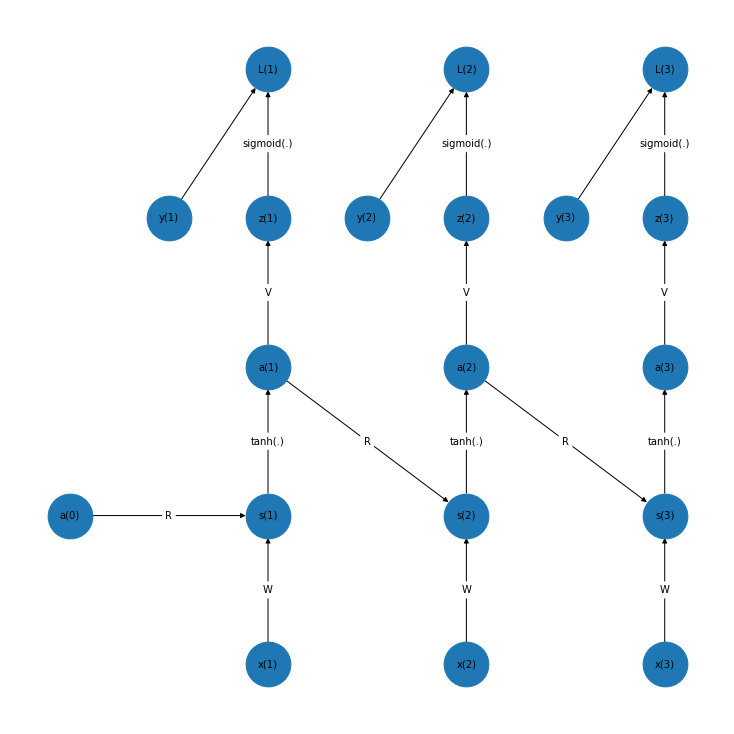

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

########## YOUR SOLUTION HERE ##########

comp_graph = nx.DiGraph()

positions = dict()
edge_lables = dict()
positions[f"a(0)"] = (0,0)

for t in [1,2,3]:
    
    comp_graph.add_edge(f"a({t-1})", f"s({t})")
    positions[f"s({t})"] = (t,0)
    edge_lables[(f"a({t-1})", f"s({t})")] = "R"
    
    comp_graph.add_edge(f"x({t})", f"s({t})")
    positions[f"x({t})"] = (t,-1)
    edge_lables[(f"x({t})", f"s({t})")] = "W"
    
    comp_graph.add_edge(f"s({t})", f"a({t})")
    positions[f"a({t})"] = (t,1)
    edge_lables[(f"s({t})", f"a({t})")] = "tanh(.)"
    
    comp_graph.add_edge(f"a({t})", f"z({t})")
    positions[f"z({t})"] = (t,2)
    edge_lables[(f"a({t})", f"z({t})")] = "V"
    
    comp_graph.add_edge(f"z({t})", f"L({t})")
    positions[f"L({t})"] = (t,3)
    edge_lables[(f"z({t})", f"L({t})")] = "sigmoid(.)"
    
    comp_graph.add_edge(f"y({t})", f"L({t})")
    positions[f"y({t})"] = (t-0.5,2)
    
    
plt.figure(1,figsize=(10,10)) 
nx.draw(comp_graph, positions,node_size=2000,font_size=10, with_labels = True)
nx.draw_networkx_edge_labels(comp_graph, positions, edge_lables, rotate=False)
plt.show()        